In [13]:
# Import packages
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from os import path, getcwd
from scipy.sparse import hstack
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import os
import re
from collections import Counter
import random
import pickle
import string
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import NuSVC, LinearSVC, SVC
# Mount Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
dir = "drive/My Drive/BT4221/Data/"

Mounted at /content/drive


In [14]:
df = pd.read_csv(dir+"cleaned_train.csv")
df = df[~df['processed_text'].isnull()]
df.reset_index(drop=True,inplace=True)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,word_count,char_count,word_density,total_length,capitals,capitals_prop,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_unique_words,prop_unique_words,processed_text,polarity,subjectivity
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,43,223,0.191964,264,17,0.064394,0,1,6,0,41,0.953488,explanation edits made username hardcore metal...,0.136364,0.454545
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,17,95,0.177083,112,8,0.071429,1,0,5,0,17,1.000000,daww match background colour seemingly stuck t...,0.200000,0.200000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42,192,0.217617,233,4,0.017167,0,0,4,0,39,0.928571,hey man really trying edit war guy constantly ...,0.150000,0.383333
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,113,511,0.220703,622,11,0.017685,0,0,6,0,82,0.725664,ca nt make real suggestion improvement wondere...,0.183333,0.297222
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13,55,0.232143,67,2,0.029851,0,1,3,0,13,1.000000,sir hero chance remember page,0.000000,0.000000


In [15]:
count_vect = pickle.load(open('/content/drive/My Drive/BT4221/Models/count_vect_v1.sav','rb'))
tf = pickle.load(open('/content/drive/My Drive/BT4221/Models/tf_v1.sav','rb'))
X= df['processed_text']
#count_vect = CountVectorizer()
X_count = count_vect.transform(X)
#tf = TfidfTransformer()
X = tf.fit_transform(X_count)

In [16]:
labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

toxic


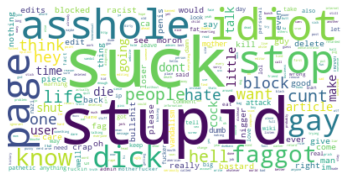

severe_toxic


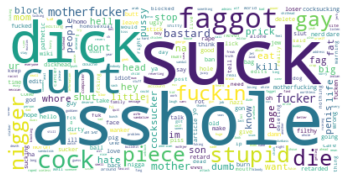

obscene


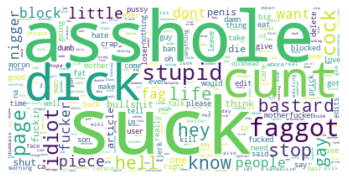

threat


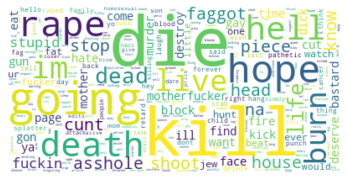

insult


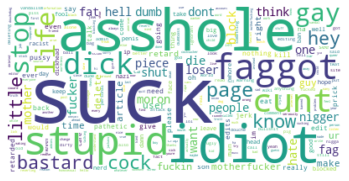

identity_hate


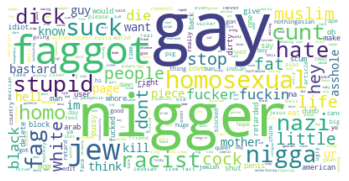

In [22]:
from wordcloud import WordCloud, ImageColorGenerator
for label in labels:
  X_ = X[df[df[label]==1].index]
  sum_words = X_.sum(axis = 0) # sum of each word occurrence in all texts in the corpus
  words_freq = [(word, sum_words[0,idx]) for word,idx in count_vect.vocabulary_.items()]
  words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
  words_freq_dict = dict(words_freq)
  words_freq_dict.pop('fuck')
  words_freq_dict.pop('fucking')
  words_freq_dict.pop('shit')
  words_freq_dict.pop('bitch')
  words_freq_dict.pop('nt')
  words_freq_dict.pop('go')
  words_freq_dict.pop('get')
  words_freq_dict.pop('like')
  words_freq_dict.pop('as')
  words_freq_dict.pop('wikipedia')

  d=getcwd()
  #mask = np.array(Image.open('../masks/baggage_handling.jpg'))
  wordcloud=WordCloud(background_color='white', stopwords=stopwords,max_words=1628).generate_from_frequencies(words_freq_dict)
  wordcloud.to_file(filename = '/content/drive/My Drive/BT4221/Admin/Word Clouds/{}_v2.jpg'.format(label))
  # the matplotlib way:
  print(label)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()